In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

from gibbs import GibbsSampling
from meanfield import MeanField
from utils import load_data, truncated_gaussian

<IPython.core.display.Javascript object>

## Gibbs Sampling

In [15]:
# Load data
X, y = load_data()

# Parameters
tau = 100.0

<IPython.core.display.Javascript object>

In [16]:
%%time
sampler = GibbsSampling(X, y, tau)
betas, zs = sampler.sample(10000)

CPU times: user 31.2 s, sys: 21.5 s, total: 52.7 s
Wall time: 8 s


<IPython.core.display.Javascript object>

#### Marginalization

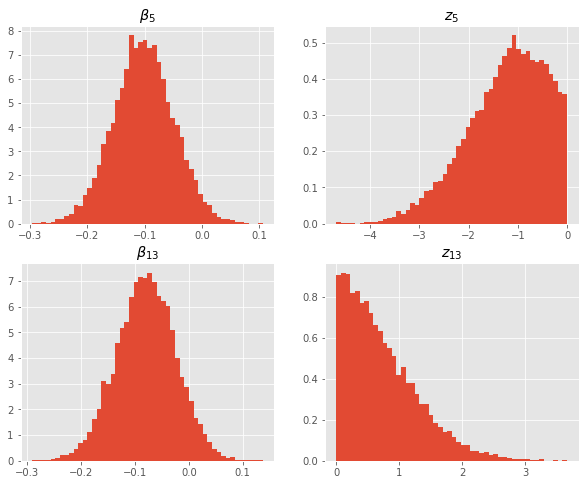

<IPython.core.display.Javascript object>

In [17]:
# Plot some marginals distributions
idxs = [5, 13]
bins = 50
fig, ax = plt.subplots(len(idxs), 2, figsize=(10, len(idxs) * 4))

for i, idx in enumerate(idxs):
    ax[i, 0].hist(betas[:, idx], bins, density=True)
    ax[i, 0].set_title("$\\beta_{%d}$" % idx)

    ax[i, 1].hist(zs[:, idx], bins, density=True)
    ax[i, 1].set_title("$z_{%d}$" % idx)

# plt.savefig("marginals.png")
plt.show()

#### Accuracy

In [24]:
y_hat = sampler.predict(X).mean(1)
y_hat = np.where(y_hat > 0, 1, -1)

print("Training accuracy:", (y_hat == y).mean())

Training accuracy: 0.787


<IPython.core.display.Javascript object>

## Mean-Field

In [4]:
# Load data
X, y = load_data()

# Parameters
tau = 100.0

<IPython.core.display.Javascript object>

In [30]:
%%time
mf = MeanField(X, y, tau)
mf.train(250)
betas, zs = mf.sample(10000)

CPU times: user 1.07 s, sys: 407 ms, total: 1.47 s
Wall time: 588 ms


<IPython.core.display.Javascript object>

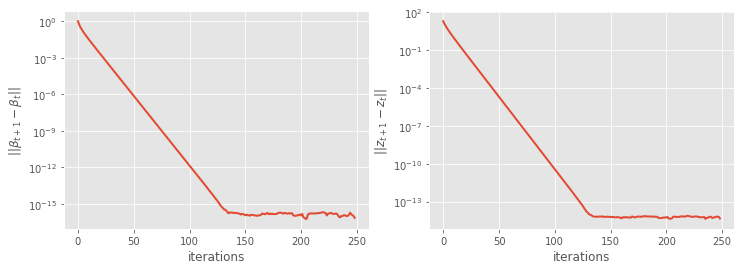

<IPython.core.display.Javascript object>

In [13]:
# Plot training curves
betas_norm = [np.linalg.norm(mf.beta_mean - b) for b in mf.betas[:-1]]
zs_norm = [np.linalg.norm(mf.z_mean - z) for z in mf.zs[:-1]]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(betas_norm, lw=2.0)
ax[0].set_ylabel("$||\\beta_{t+1} - \\beta_{t}||$")
ax[1].plot(zs_norm, lw=2.0)
ax[1].set_ylabel("$||z_{t+1} - z_{t}||$")
for i in range(2):
    ax[i].set_yscale("log")
    ax[i].set_xlabel("iterations")
plt.show()

#### Marginalization

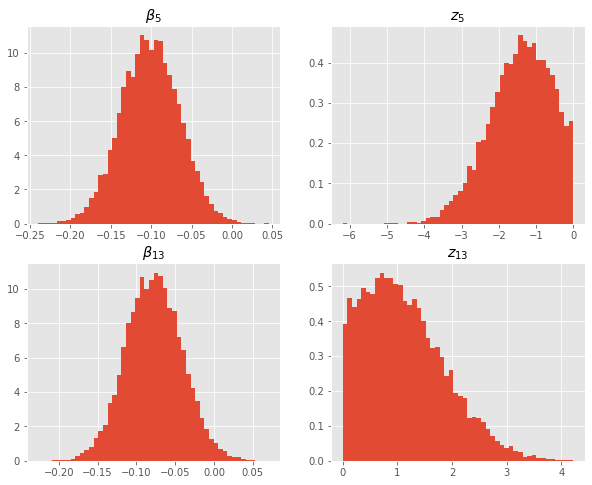

<IPython.core.display.Javascript object>

In [9]:
# Plot some marginals distributions
idxs = [5, 13]
bins = 50
fig, ax = plt.subplots(len(idxs), 2, figsize=(10, len(idxs) * 4))

for i, idx in enumerate(idxs):
    ax[i, 0].hist(betas[:, idx], bins, density=True)
    ax[i, 0].set_title("$\\beta_{%d}$" % idx)

    ax[i, 1].hist(zs[:, idx], bins, density=True)
    ax[i, 1].set_title("$z_{%d}$" % idx)

plt.show()

#### Training accuracy

In [29]:
y_hat = mf.predict(X, n_sample=10000).mean(1)
y_hat = np.where(y_hat > 0, 1, -1)

print("Training accuracy:", (y_hat == y).mean())

Training accuracy: 0.785


<IPython.core.display.Javascript object>